# MOHAMMAD ZACHARY ABIDIN

## Machine Learning TIME SERIES FORECASTING (ARIMA)

Tujuan dari pembuatan model machine learning ini adalah untuk dapat memprediksi total quantity harian dari product yang terjual.

HINTS!!!
* Data cleansing terlebih dahulu, merubah tipe data
supaya sesuai
* Data merge untuk menggabungkan semua data
* Membuat data baru untuk regression, yaitu groupby by date lalu yang di aggregasi adalah qty di sum
* Akan ada sekitar 365 rows / baris
* Menggunakan metode time series ARIMA

In [ ]:
# Mengkoneksi ke Google Drive untuk dapat mengakses Data khusus Forecasting
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Explanatory Data Analysis (EDA)

###1 Importing dependencies

> Melakukan `import` software library yang diperlukan untuk sesi ini, antara lain:

**1. Data Manipulasi**
* `pandas`, dapat dialiaskan/disingkat sebagai `pd`
* `numpy`, dapat dialiaskan/disingkat sebagai `np`

**2. Data Visualisasi**
* `matplotlib.pyplot`, dapat dialiaskan/disingkat sebagai `plt`
* `seaborn`, dapat dialiaskan/disingkat sebagai `sns`

**3. Modeling**
* `statsmodels`
  * `statsmodels.api`, dapat dialiaskan/disingkat sebagai `sm`
  * `statsmodels.tsa.api`, dapat dialiaskan/disingkat sebagai `smt`
  * `statsmodels.formula.api`, dapat dialiaskan/disingkat sebagai `smf`
  * adfuller (Augmented Dickey Fuller test)
  * Model ARIMA
  * Model HoltWinters (Model Exponential Smoothing, Simple Exponential Smoothing, Holt)
  * Model SARIMAX
* `sklearn`
  * `sklearn.metrics` (MAE, MAPE, MSE)

**4. Set warning**

**5. %Magic command line**

**6. package, modul lainnya**

In [ ]:
import pandas as pd                   # Alias digunakan untuk mempermudah kita memanggil software library dan methods didalamnya
import numpy as np                    # Numpy adalah paket dasar untuk komputasi ilmiah di python
from math import sqrt                 # memanggil function sqrt, operasi matematika akar
from pandas import Series             # function Series seperti aray 1 dimensi (dengan axis sebagai index) untuk menyimpan berbagai
                                      #tipe data, seperti integer, string, float, python objects, etc.

from matplotlib import pyplot         # pyplot adalah sekumpulan fungsi dari matplotlib yang membuatnya bekerja seperti halnya MATLAB.
from matplotlib.pyplot import figure  # figure memberikan identifier unik untuk sebuah gambar grafik dari pyplot
import matplotlib.pyplot as plt       # matplotlib adalah library komprehensif untuk membuat visualisasi statis, animasi, maupun interaktif di Python
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k') # menetapkan format gambar grafik dg ukuran (16,12), dpi=80, facecolor=white, edgecolor=black
from matplotlib.pylab import rcParams # rc (runtime configuration) parameters, untuk merubah tampilan visual output matplotlib secara interaktif,
                                      # (misal ubah warna, jenis garis untuk grafik dll)

import statsmodels.api as sm          # modul berisikan classes dan functions digunakan untuk estimasi model-model statistik, uji tes statistik, dan eksplorasi data.
import statsmodels.tsa.api as smt     # digunakan untuk mengakses Time-series models dan methods pd librari statsmodels
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt  # mengakses 3 modul holt-winters di modul time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose #mengakses modul seasonal decompose pada modul time series analysis
from statsmodels.tsa.stattools import adfuller # mengakses function Augmented Dickey-Fuller unit root test.
from statsmodels.tsa.arima_model import ARIMA  # mengakses function ARIMA
!pip install pmdarima
from pmdarima import auto_arima
import statsmodels.formula.api as smf # digunakan untuk menentukan model dengan formula strings dan DataFrames.
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

from datetime import datetime
import warnings                       # built-in modul untuk menghandle message dari issue warning, jika ada package yg obsolete
warnings.filterwarnings('ignore')     # filter untuk mengabaikan tipe warning
import sys                            # mengakses built-in function pada Python (args maupun keyword-args)
import itertools                      # digunakan iterasi pada struktur data yang dapat ditulis ulang menggunakan for-loop.
                                      # Struktur data seperrti ini juga dikenal sebagai iterables
import seaborn as sns                 # Adalah library visualisasi data di Python yg berdasarkan matplotlib
%matplotlib inline

<Figure size 1280x960 with 0 Axes>

## 2 Upload Dataset
> Data yang digunakan adalah data gabungan yang sudah di Query di Dbeaver khusus untuk Machine Learning Forecasting

In [ ]:
# Memanggil data
data_new=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Rakamin_Kalbe/dataset/Data_ML_Regression.csv')

In [ ]:
data_new.shape

(365, 2)

In [ ]:
# Menampilkan 20 baris pertama pada dataframe (default n = 5)
data_new.head(20)

,tanggal,total_qty
0,2022-01-01,49
1,2022-01-02,59
2,2022-01-03,63
3,2022-01-04,45
4,2022-01-05,30
5,2022-01-06,71
6,2022-01-07,37
7,2022-01-08,47
8,2022-01-09,47
9,2022-01-10,60


In [ ]:
# Menampilkan 20 baris terakhir pada dataframe (default n = 5)
data_new.tail(20)

,tanggal,total_qty
345,2022-12-12,52
346,2022-12-13,50
347,2022-12-14,26
348,2022-12-15,46
349,2022-12-16,29
350,2022-12-17,35
351,2022-12-18,54
352,2022-12-19,29
353,2022-12-20,41
354,2022-12-21,64


In [ ]:
# Melihat data Maximal Minimal dari kolom tanggal
print(data_new['tanggal'].min())
print(data_new['tanggal'].max())

2022-01-01
2022-12-31


In [ ]:
# melihat data Maximal Minimal dari kolom total_qty
print(data_new['total_qty'].min())
print(data_new['total_qty'].max())

15
119


## 3 Data Exploration

* Sangat penting untuk memahami dan memperoleh pengetahuan lebih banyak tentang data yang di upload, data historikalnya hanya meliputi kolom total_qty perhari di tiap bulannya.

* Sebelum masuk ke tahap analisa, perlu melakukan pre-processing, yaitu mengubah bentuk tipe data di kolom 'tanggal' dari 'object' ke 'datetime'.

In [ ]:
# Menampilkan nama kolom
data_new.columns

Index(['tanggal', 'total_qty'], dtype='object')

In [ ]:
# Menampilkan info dari tiap variable
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tanggal    365 non-null    object
 1   total_qty  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


* dapat dilihat bahwa kolom 'tanggal' dan 'total_qty' sama memiliki 365 baris, terbukti bahwa tidak ada data yang null/kosong

* data pada kolom tanggal masih berupa object, sehingga harus diubah ke
datetime dengan fungsi `to_datetime()` dari library Pandas

In [ ]:
# Pada kolom tanggal, ubah tipe data menjadi datetime
data_new['tanggal']=pd.to_datetime(data_new['tanggal'], infer_datetime_format=True)

In [ ]:
# Cek tipe data
print (data_new.dtypes)

tanggal      datetime64[ns]
total_qty             int64
dtype: object


> kolom 'tanggal' sudah berubah menajadi datetime,
> kemudian menjadikan kolom 'tanggal' sebagai index dalam dataframe untuk forecasting time series

In [ ]:
# Set kolom 'tanggal' sebagai index
data_new=data_new.set_index(['tanggal'])
data_new.head()

,total_qty
tanggal,
2022-01-01,49
2022-01-02,59
2022-01-03,63
2022-01-04,45
2022-01-05,30


In [ ]:
# Summary statistics pada variabel 'total_qty'
print (data_new.describe())
print ('---------')

# Pembulatan decimal 2 angka di belakang koma dan di transformasi agar mudah dibaca
print(data_new.describe().T.round(2))

        total_qty
count  365.000000
mean    50.126027
std     16.704461
min     15.000000
25%     38.000000
50%     49.000000
75%     59.000000
max    119.000000
---------
           count   mean   std   min   25%   50%   75%    max
total_qty  365.0  50.13  16.7  15.0  38.0  49.0  59.0  119.0


## 4 Data Analysis

* Untuk memulai data analysis, perlu mengeksplor data terlebih dahulu melalui visualisasi ke dalam bentuk grafik.

* Karena akan melakukan forecasting maka akan menggunakan Time series plot.

* Tujuan dari time Series plot untuk memudahkan menemukan pattern atau pola dan temuan yang tidak biasa (unusual observations) dari dataset yang digunakan

### 4.1 Time Series Plot

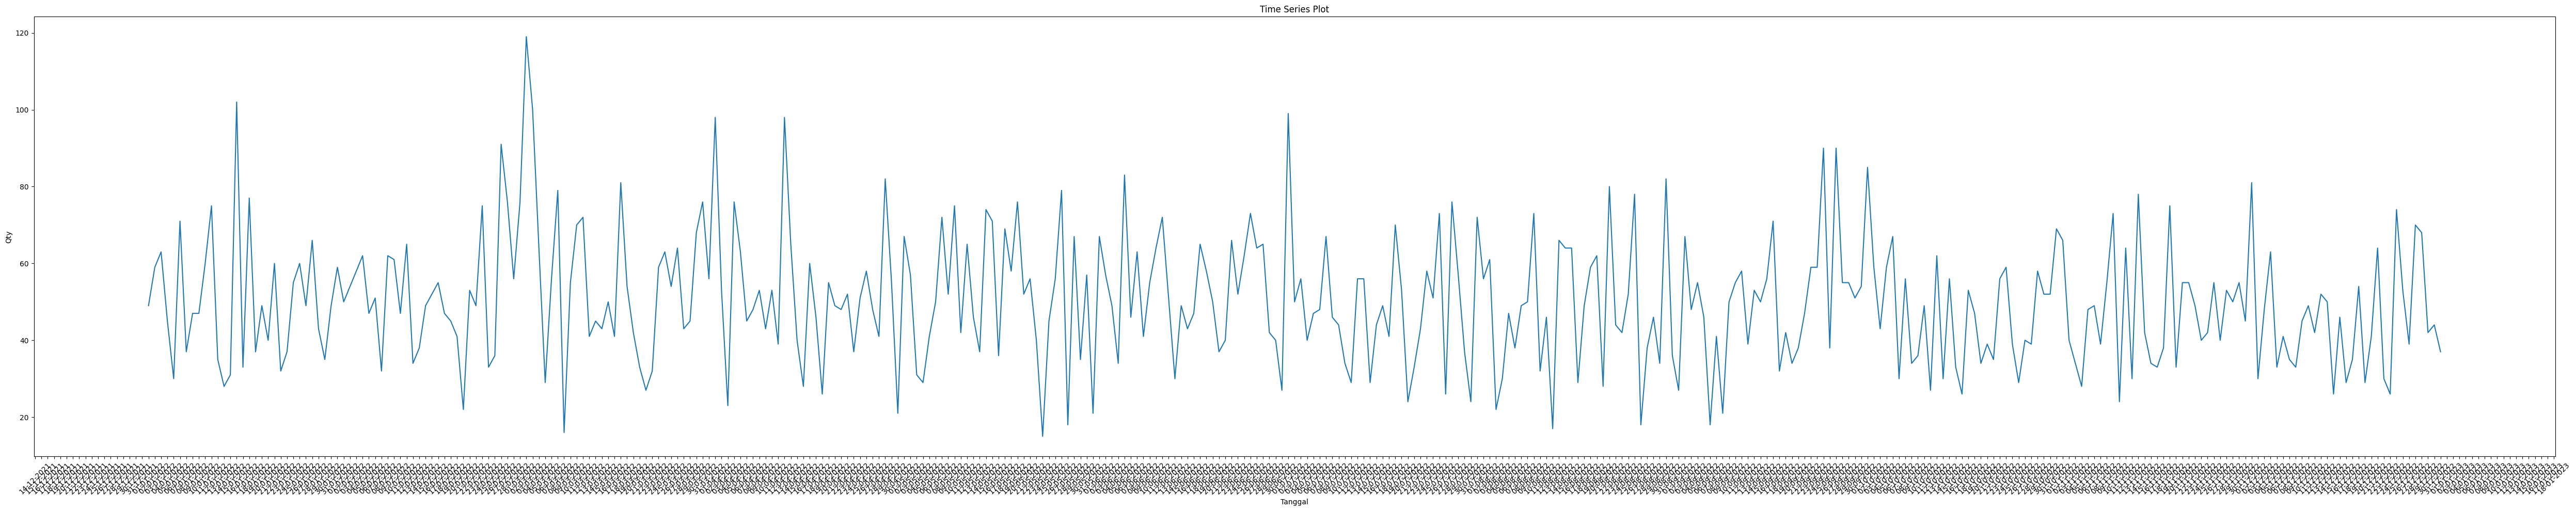

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting time series dengan interval harian
plt.figure(figsize=(50, 10))
plt.plot(data_new.index, data_new['total_qty'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.xlabel('Tanggal')
plt.ylabel('Qty')
plt.title('Time Series Plot')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


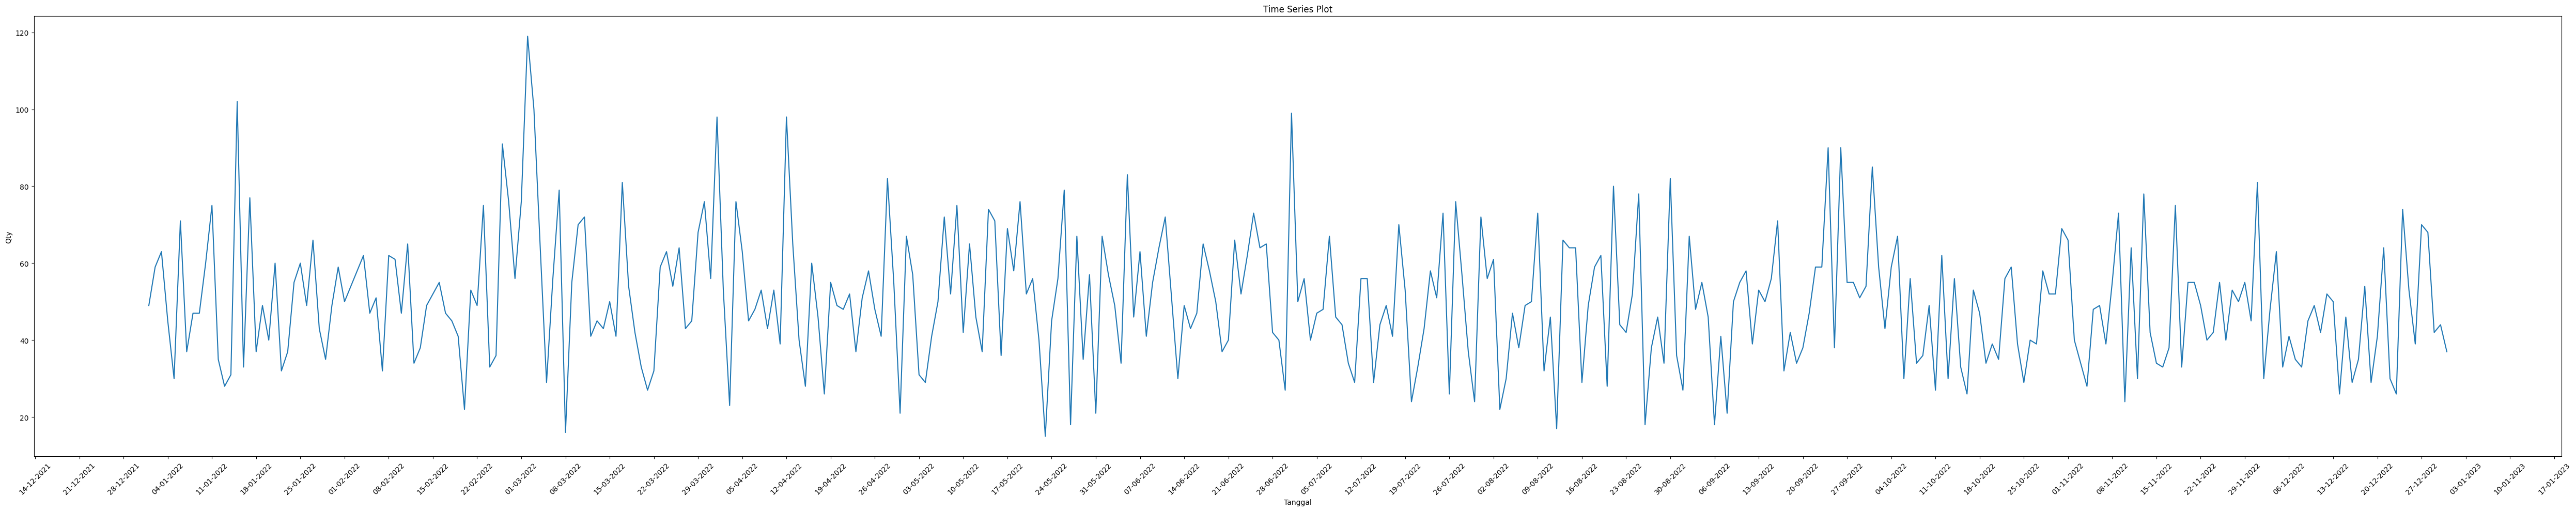

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting time series dengan interval mingguan
plt.figure(figsize=(50, 10))
plt.plot(data_new.index, data_new['total_qty'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())
plt.xlabel('Tanggal')
plt.ylabel('Qty')
plt.title('Time Series Plot')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

karena datanya terlalu panjang dan `xlabel` nya tidak terlihat jika menggunakan interval per-hari atau per-minggu, maka akan disederhanakan saja format intervalnya menjadi per-bulan

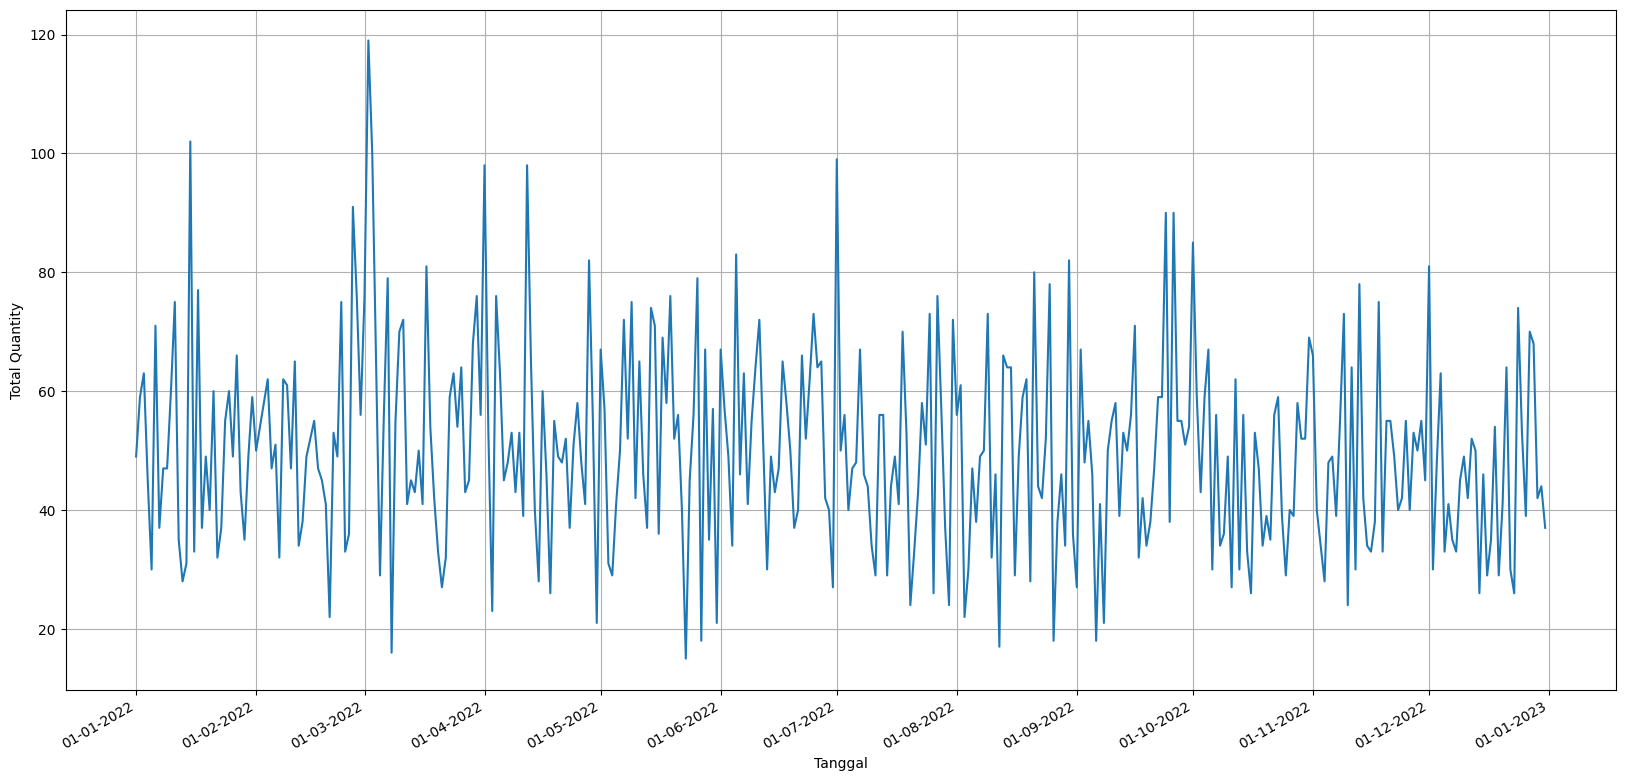

In [ ]:
# Time Series plot

import matplotlib.dates as mdates
import matplotlib.pyplot as plty

fig, ax = plty.subplots(figsize=(20,10))
plty.xlabel("Tanggal")
plty.ylabel("Total Quantity")

half_year_locator = mdates.MonthLocator(interval = 1)
year_month_formatter = mdates.DateFormatter('%d-%m-%Y')

ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter)

ax.plot(data_new)
fig.autofmt_xdate()
plty.grid()
plty.show()

> Data lebih enak dilihat dan dipahami dan juga interval nya dalam kurun waktu 1 bulan.

> **Insight:**

 * Data yang ditampilkan sangat acak sehingga tidak dapat menentukan apakah jenis data ini merupkan jenis yang Seasonal, Cyclic, Trend Linier atau Non-Linier, atau bahkan data ini merupakan White Noise atau data acak yang tidak memiliki pola atau tren yang jelas
 * Untuk melihat pola dan trem pada data bisa menggunakan rolling average ataupun regresi linier pada data

### 4.2 identification of Patterns and Trends

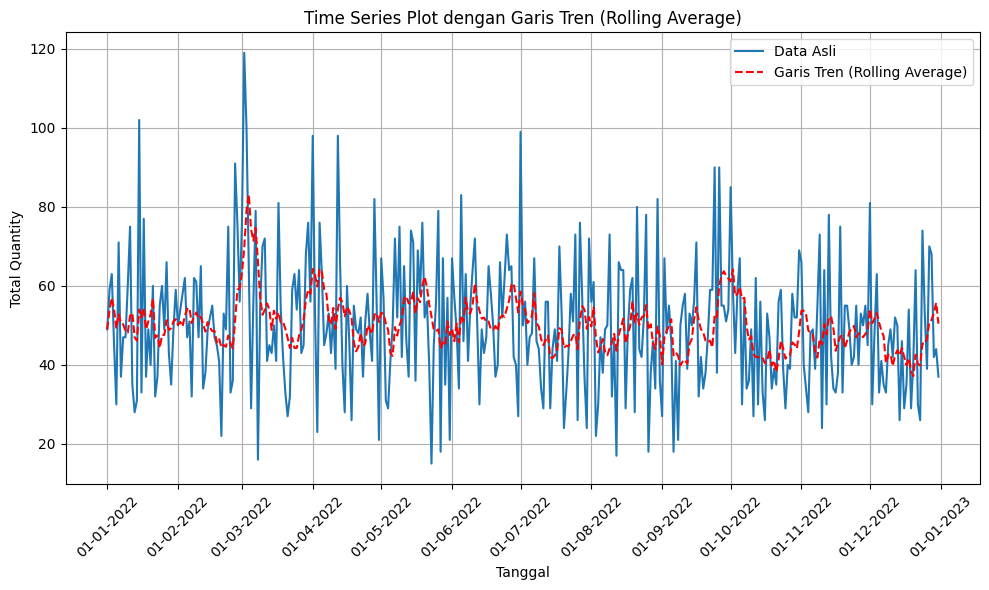

In [ ]:
# Memastikan jenis pola dan tren pada data menggunakan Rolling Average

import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# Plotting time series dengan label bulanan
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data_new.index, data_new['total_qty'], label='Data Asli')

# Menghitung rolling average dengan jendela 7 hari
rolling_avg = data_new['total_qty'].rolling(window=7, min_periods=1).mean()
ax.plot(data_new.index, rolling_avg, label='Garis Tren (Rolling Average)', linestyle='--', color='red')

# Mengatur format tanggal pada sumbu X
half_year_locator = mdates.MonthLocator(interval=1)
year_month_formatter = mdates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter)

# Atur legenda
ax.legend()

# Tampilkan plot
plt.xlabel("Tanggal")
plt.ylabel("Total Quantity")
plt.title('Time Series Plot dengan Garis Tren (Rolling Average)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()


> **Insights:**

* Dengan menggunakan Rolling Average, masih belum terlihat jenis pola dan tren pada data

* Pencarian pola dan tren dilanjutkan menggunakan Regresi Linier


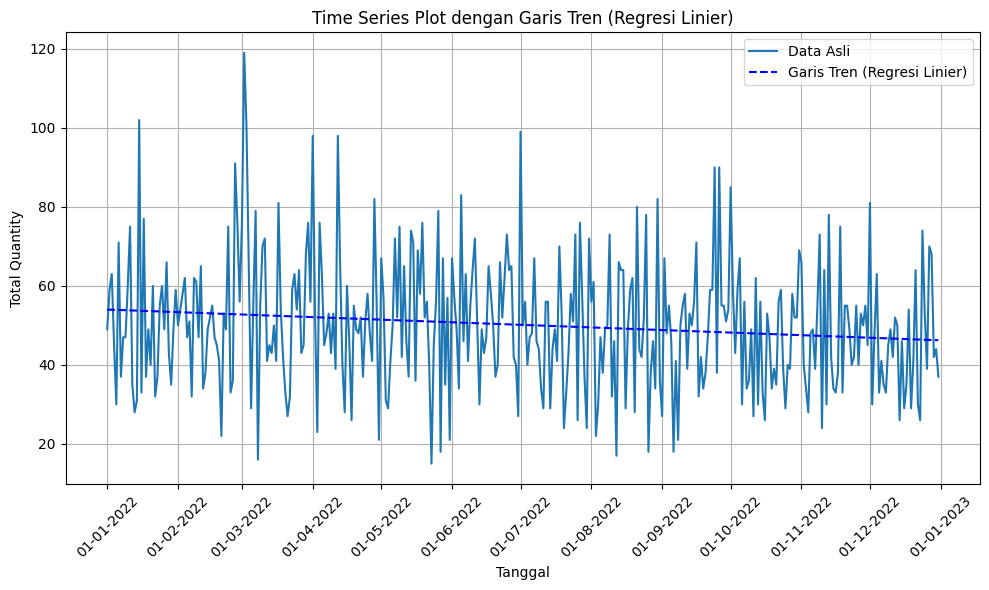

In [ ]:
# Memastikan jenis pola dan tren pada data menggunakan Regresi Linier

import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# Plotting time series dengan label bulanan
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data_new.index, data_new['total_qty'], label='Data Asli')

# Lakukan regresi linier pada data_new (x=indeks, y=total_qty)
x = data_new.index.to_series().apply(lambda date: date.toordinal()).values
y = data_new['total_qty'].values
coef = np.polyfit(x, y, deg=1)
trend = np.polyval(coef, x)
ax.plot(data_new.index, trend, label='Garis Tren (Regresi Linier)', linestyle='--', color='blue')

# Mengatur format tanggal pada sumbu X
half_year_locator = mdates.MonthLocator(interval=1)
year_month_formatter = mdates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter)

# Atur legenda
ax.legend()

# Tampilkan plot
plt.xlabel("Tanggal")
plt.ylabel("Total Quantity")
plt.title('Time Series Plot dengan Garis Tren (Regresi Linier)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()


> **Insights:**

> Bila menggunakan regresi linear pada data, terlihat bahwa Garis Tren (Regresi Linier) cenderung turun kebawah.

> Saya berkesimpulan bahwa data yang ada merupakan data dengan Tren dengan kecenderungan turun.

### 4.3 Change the data into Stationary

> Jika data yang digunakan memiliki tren linier menurun, artinya data tersebut tidak stasioner karena memiliki kecenderungan atau pola yang berubah seiring berjalannya waktu seperti hasil Time Series Plot pada sub-bab 4.1. Untuk menggunakan model ARIMA, perlu menjadikan data stasioner terlebih dahulu.

> dua pendekatan berikut untuk membuat data menjadi stasioner:

* Differencing: Lakukan differencing dengan mengurangi nilai pada waktu sekarang dengan nilai pada waktu sebelumnya. Dengan demikian, diharapkan data dapat menghilangkan tren linier.

* Transformasi Logaritmik: Jika tren linier menurun dikarenakan varians data meningkat secara eksponensial, dapat dilakukan transformasi logaritmik untuk menstabilkan variansnya.

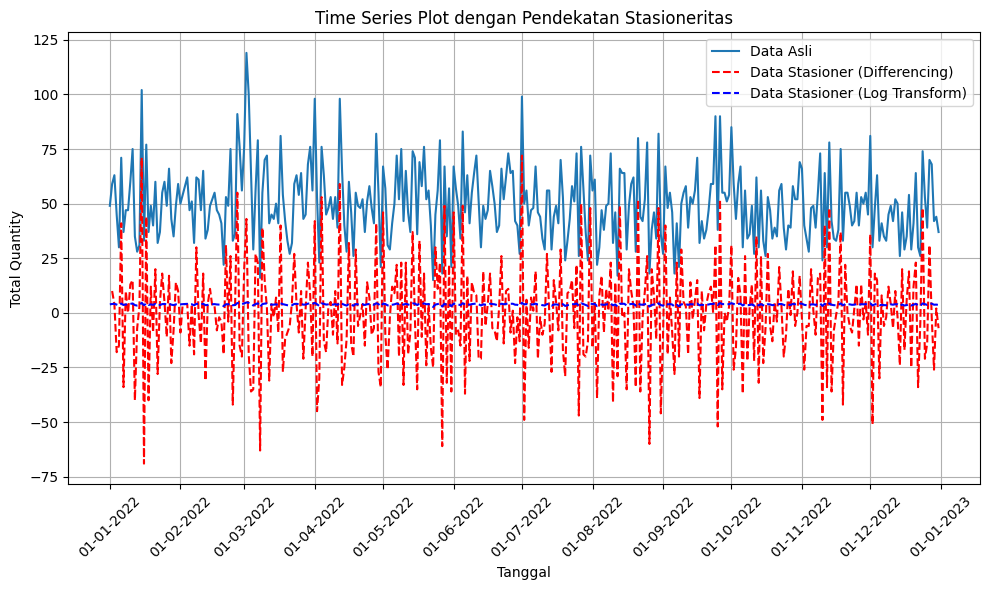

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Plotting time series dengan label bulanan
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data_new.index, data_new['total_qty'], label='Data Asli')

# Pendekatan 1: Differencing dengan order 1
data_stasioner_diff = data_new['total_qty'].diff(1).dropna()
ax.plot(data_stasioner_diff.index, data_stasioner_diff, label='Data Stasioner (Differencing)', linestyle='--', color='red')

# Pendekatan 2: Transformasi Logaritmik
data_stasioner_log = np.log(data_new['total_qty'])
ax.plot(data_stasioner_log.index, data_stasioner_log, label='Data Stasioner (Log Transform)', linestyle='--', color='blue')

# Mengatur format tanggal pada sumbu X
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

# Atur legenda
ax.legend()

# Tampilkan plot
plt.xlabel("Tanggal")
plt.ylabel("Total Quantity")
plt.title('Time Series Plot dengan Pendekatan Stasioneritas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()


> Dengan menggunakan Log Transform, data terlihat sudah flat/datar, data Stasioner dengan Differencing juga mirip seperti data aslinya. Kemungkinan data sudah Stasioner

---
> Selanjutnya dapat cek secara visual (menggunakan rolling mean & std) dan melakukan uji statistik (statistical test) dengan Dickey-Fuller tes untuk melakukan konfirmasi apakah data yang dimiliki merepresentasikan bentuk stasioner.

### 4.4 Stasionarity Check

> Ada beberapa cara untuk mengecek apakah data sudah stasioner atau belum. Dalam konteks analisis time series, stasioneritas dapat diuji menggunakan beberapa metode seperti:

* Rolling Statistics: Hitung moving average atau moving variance dari data Anda dan plot bersamaan dengan data asli. Jika rata-rata atau variansnya bervariasi seiring waktu, maka data tersebut mungkin tidak stasioner.

* Augmented Dickey-Fuller Test: Ini adalah uji statistik yang umum digunakan untuk menguji stasioneritas data time series. Uji ini menguji hipotesis bahwa data memiliki akar unit (non-stasioner) atau tidak memiliki akar unit (stasioner). Jika p-value dari uji ini kurang dari tingkat signifikansi yang ditentukan (misalnya 0.05), maka kita dapat menolak hipotesis bahwa data memiliki akar unit dan menyimpulkan bahwa data tersebut stasioner.

* Selanjutnya, menggunakan ADF test untuk uji stasioner dimana:

  **H0:** Deret waktu tidak stasioner. Dengan kata lain, ia memiliki struktur yang bergantung pada waktu dan tidak memiliki varian konstan dari waktu ke waktu.

 **H1:** Time Seeries adalah Stasioner.

* Jika **p-value** test kurang dari significance level (disini saya menentukan alpha = 0.05) dan nilai ADF test lebih kecil dibandingkan critical values maka  dapat reject null hypothesis dan dapat menyimpulkan bahwa time series adalah stasioner.

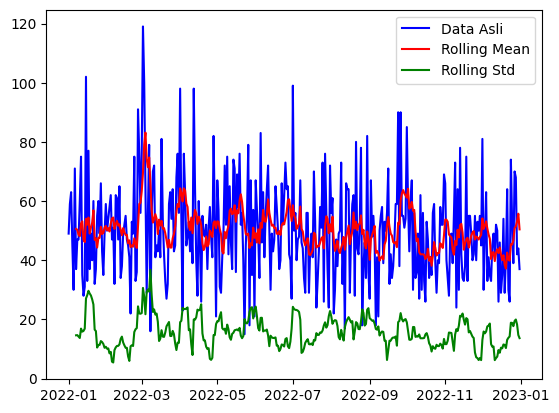

Hasil Augmented Dickey-Fuller Test:
ADF Statistik: -19.448086319449082
p-value: 0.0
Banyak Lags: 0
Banyak Observasi: 364
Nilai Kritis:
	 1% : -3.4484434475193777
	 5% : -2.869513170510808
	 10% : -2.571017574266393


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Fungsi untuk melakukan Augmented Dickey-Fuller Test
def test_stationarity(timeseries):
    # Menampilkan rolling statistics
    rolling_mean = timeseries.rolling(window=7).mean()
    rolling_std = timeseries.rolling(window=7).std()
    plt.plot(timeseries, color='blue', label='Data Asli')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='green', label='Rolling Std')
    plt.legend()
    plt.show()

    # Melakukan Augmented Dickey-Fuller Test
    result = adfuller(timeseries, autolag='AIC')
    print('Hasil Augmented Dickey-Fuller Test:')
    print('ADF Statistik:', result[0])
    print('p-value:', result[1])
    print('Banyak Lags:', result[2])
    print('Banyak Observasi:', result[3])
    print('Nilai Kritis:')
    for key, value in result[4].items():
        print('\t', key, ':', value)

test_stationarity(data_new['total_qty'])


> **Insights 1 Rolling Mean and Stanadard Deviation:**

>Dari grafik di atas dapat dilihat bahwa data aktual dan rolling (mean dan std) memiliki bentuk yang **mirip** dengan data asli, menandakan bahwa **series** ini **stasioner**.


---

> **Insights 2 Augmented Dickey-Fuller (ADF) Test:**

>Dapat dilihat dari hasil Dickey-Fuller test ini, bahwa untuk tingkat keyakinan 5% dan 10% sudah menunjukkan series ini stasioner dimana p-value 0.0 yg < 0.05 dan < 0.01 yang menunjukkan bahwa hasil menolak null hypothesis dan menerima h1 hypothesis (reject to fail H0, accept H1), dan menyatakan bahwa series ini stasioner.

> Dapat juga dilihat pada hasil `ADF Statistic (-19.44808) < DF critical value 1% (-3.44844)` maka, null hypothesis (H0) ditolak dan menerima H1 yang menyatakan pada series terbukti stasioner pada tingkat keyakinan 1% (*significance level* of 0.01).

In [ ]:
print(data_stasioner_log.isnull().sum())
print(data_stasioner_diff.isnull().sum())

0
0


### 4.5 Autocorrelation Function (ACF) dan Partial Autocorrelation Function (PACF)

**Autocorrelation Function (ACF) dan Partial Autocorrelation Function (PACF)**

* Selanjutnya cara lain untuk melakukan tes stasioner adalah dengan menggunakan ACF dan PACF.

* Masih ingat dengan konsep sederhana Correlation yang sudah kita dipelajari di topik Statistik sebelummnya? Kedua function berdasarkan konsep dari Correlation.

* ACF merupakan korelasi antar data di dalam time series tersebut yang dipisahkan dalam lag dimana  (Xt , Xk+t) dengan k adalah jumlah lag dan t adalah nilainya.

* Sama halnya dengan ACF, PACF juga menghitung korelasi antar data di time series. Perbedaannya, PACF juga menghitung korelasi antara Xt dan Xt+k namun sebelumnya menghilangkan data antara Xt dan Xt+k terlebih dahulu. Berarti data yang dihilangkan adalah data  Xt+1 sampai dengan Xt+k-1


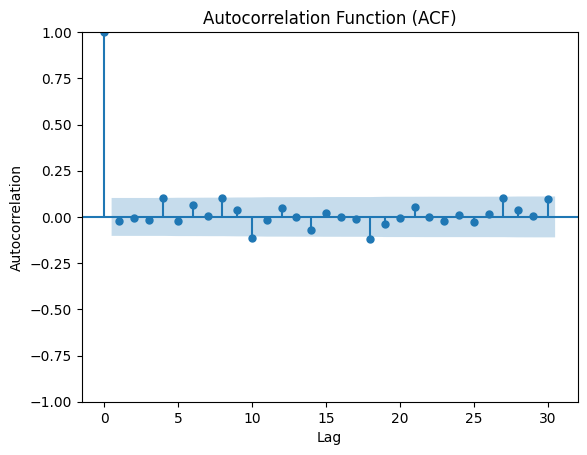

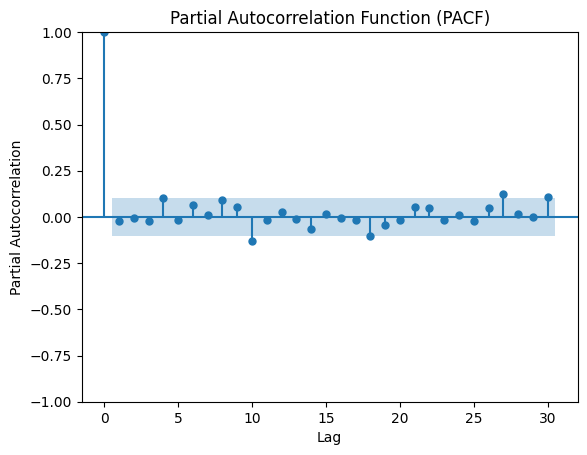

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plot_acf(data_new['total_qty'], lags=30)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plot_pacf(data_new['total_qty'], lags=30)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


Dalam contoh di atas, kita menggunakan plot_acf() dan plot_pacf() untuk menghitung dan memplot ACF dan PACF dari data data_new['total_qty']. Fungsi ini akan menghasilkan grafik yang menunjukkan nilai ACF dan PACF pada berbagai lag (waktu sebelumnya) dari data time series.

Grafik ACF akan menunjukkan korelasi antara data pada waktu sekarang dengan data pada waktu-waktu sebelumnya, sementara grafik PACF akan menunjukkan korelasi langsung antara data pada waktu tertentu setelah menghilangkan pengaruh data pada waktu-waktu sebelumnya.

Dengan melihat grafik ACF dan PACF, Anda dapat mencari nilai p dan q yang sesuai untuk model ARIMA. Nilai p adalah lag terakhir di mana ACF masih signifikan, sementara nilai q adalah lag terakhir di mana PACF masih signifikan. Anda dapat menggunakan informasi ini untuk memilih nilai p dan q saat membangun model ARIMA.


> Setelah data Anda terbukti stasioner, langkah selanjutnya adalah membangun model time series untuk melakukan forecasting atau analisis lebih lanjut. Salah satu model time series yang populer adalah model ARIMA (AutoRegressive Integrated Moving Average). Berikut adalah langkah-langkah selanjutnya yang dapat Anda lakukan:

> Pilih Nilai p dan q: Berdasarkan hasil uji ACF (Autocorrelation Function) dan PACF (Partial Autocorrelation Function) pada data stasioner, Anda dapat memilih nilai p dan q yang sesuai untuk model ARIMA. Nilai p adalah jumlah lag autoregressive, sementara nilai q adalah jumlah lag moving average.

> Split Data: Bagi data Anda menjadi dua bagian: data pelatihan (train) dan data validasi (test). Data pelatihan akan digunakan untuk melatih model ARIMA, sedangkan data validasi akan digunakan untuk menguji performa model.

> Buat Model ARIMA: Buat model ARIMA dengan menggunakan nilai p dan q yang telah Anda pilih sebelumnya. Anda dapat menggunakan library seperti statsmodels.tsa.arima.model.ARIMA untuk membangun model ini.

> Latih Model: Latih model ARIMA menggunakan data pelatihan. Anda dapat menggunakan metode fit() pada model ARIMA.

> Forecast dan Evaluasi: Gunakan model yang telah dilatih untuk melakukan forecasting pada data validasi. Evaluasi performa model menggunakan metrik seperti Mean Squared Error (MSE), Root Mean Squared Error (RMSE), atau Mean Absolute Error (MAE) untuk melihat sejauh mana model Anda dapat memprediksi data yang belum dilihat sebelumnya.

> Berikut adalah contoh kode untuk membangun dan melatih model ARIMA pada data stasioner:

# Model development

## 5 Model Development

> Model yang digunakan adalah ARIMA.

> **Apa itu ARIMA ?**

* ARIMA sering juga disebut metode runtun waktu Box-Jenkins. ARIMA sangat
baik ketepatannya untuk peramalan jangka pendek, sedangkan untuk peramalan jangka panjang ketepatan peramalannya kurang baik. Biasanya akan cenderung flat
(mendatar/konstan) untuk periode yang cukup panjang.

* Model Autoregresif Integrated Moving Average (ARIMA) adalah model yang
secara penuh mengabaikan independen variabel dalam membuat peramalan. ARIMA
menggunakan nilai masa lalu dan sekarang dari variabel dependen untuk menghasilkan peramalan jangka pendek yang akurat. ARIMA cocok jika observasi dari deret waktu (time series) secara statistik berhubungan satu sama lain (dependent).

In [ ]:
# mengecek bentuk data
data_new.head(20)

,total_qty
tanggal,
2022-01-01,49
2022-01-02,59
2022-01-03,63
2022-01-04,45
2022-01-05,30
2022-01-06,71
2022-01-07,37
2022-01-08,47
2022-01-09,47


In [ ]:
data_new.shape

(365, 1)

saya memindahkan data_new ke variabel daily_quantity agar tidak rancu dengan yang sebelumnya (Menurut saya ini memudahkan saya dalam menggunakan model Time Series Forecasting)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima

daily_quantity = data_new

In [ ]:
# Menggunakan Auto ARIMA untuk menentukan parameter secara otomatis pada 'p', 'q', dan 'r'
model = auto_arima(daily_quantity['total_qty'], seasonal=False, trace=True, allow_nan_inf=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3346.981, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3240.037, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3344.981, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3200.778, Time=0.36 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3159.485, Time=0.49 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=3152.157, Time=1.12 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=3138.269, Time=0.92 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=5.12 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.41 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=3136.272, Time=0.52 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=3150.161, Time=0.36 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=3095.375, Time=1.39 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=3093.741, T

In [ ]:
# Melatih model ARIMA dengan parameter terbaik
model.fit(daily_quantity['total_qty'])

ARIMA(order=(4, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
# Melakukan forecast untuk periode yang diinginkan
# Ganti 'n_steps' dengan jumlah langkah yang ingin Anda forecast ke depan
n_steps = 29
forecast, conf_int = model.predict(n_periods=n_steps-1, return_conf_int=True)

In [ ]:
# Konversi hasil forecast menjadi DataFrame
forecast_index = pd.date_range(daily_quantity.index[-1], periods=n_steps, closed='right')
forecast_series = pd.Series(forecast, index=forecast_index)
lower_bound = pd.Series(conf_int[:, 0], index=forecast_index)
upper_bound = pd.Series(conf_int[:, 1], index=forecast_index)

In [ ]:
# Tampilkan ringkasan dari model terbaik
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(4, 1, 1)   Log Likelihood               -1540.871
Date:                Fri, 28 Jul 2023   AIC                           3093.741
Time:                        10:18:27   BIC                           3117.124
Sample:                    01-01-2022   HQIC                          3103.035
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0347      0.048     -0.726      0.468      -0.128       0.059
ar.L2         -0.0180      0.052     -0.344      0.731      -0.120       0.084
ar.L3         -0.0300      0.051     -0.586      0.5

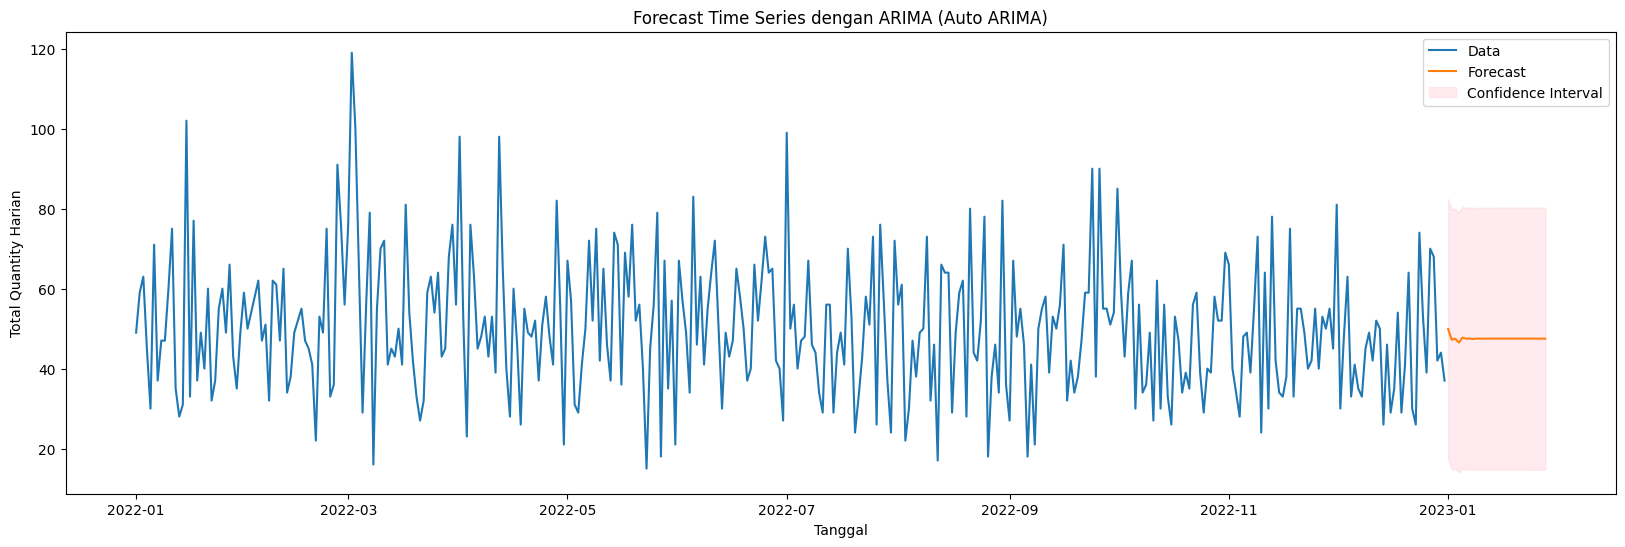

In [ ]:
# Plot hasil forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.plot(daily_quantity['total_qty'], label='Data')
plt.plot(forecast_series, label='Forecast')
plt.fill_between(forecast_index, lower_bound, upper_bound, color='pink', alpha=0.3, label='Confidence Interval')
plt.xlabel('Tanggal')
plt.ylabel('Total Quantity Harian')
plt.title('Forecast Time Series dengan ARIMA (Auto ARIMA)')
plt.legend(loc='best')
plt.show()

> **Insight**

* Hasil forecasting hanya garis datar
* Data sudah terbukti stasioner
* Data tidak memiliki pola atau tren yang unik
* Jika data sudah stasioner dan tidak memiliki tren atau pola yang menarik, hasil forecastingnya mungkin akan datar karena model ARIMA akan cenderung membuat prediksi yang sama atau mendekati nilai rata-rata data.
* Model ARIMA mungkin tidak cocok untuk data yang ada. ARIMA adalah model yang cukup sederhana dan mungkin tidak dapat menangkap pola yang kompleks dalam data time series yang digunakan ini

## 6 Plot forecast with Confidence band

> Melakukan visualisasi nilai prediksi beserta interval keyakinan

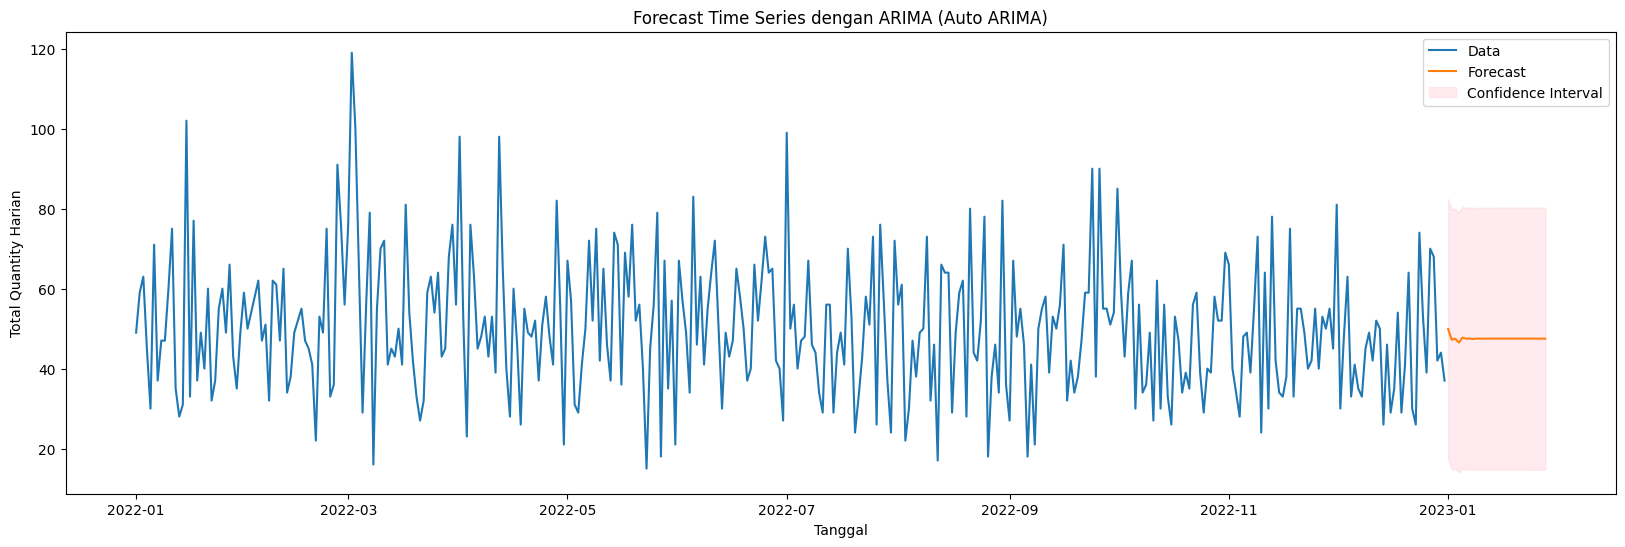

In [ ]:
# Plot hasil forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.plot(daily_quantity['total_qty'], label='Data')
plt.plot(forecast_series, label='Forecast')
plt.fill_between(forecast_index, lower_bound, upper_bound, color='pink', alpha=0.3, label='Confidence Interval')
plt.xlabel('Tanggal')
plt.ylabel('Total Quantity Harian')
plt.title('Forecast Time Series dengan ARIMA (Auto ARIMA)')
plt.legend(loc='best')
plt.show()

## 7 Analisa dan Kesimpulan

### 7.1 Analisa

> Ada beberapa hasil analisa yang saya temukan pada hasil time series forecasting ini gagal, seperti:

* Data tidak memiliki tren naik ataupun tren turun
* Data yang terlalu kompleks untuk digunakan dalam model ARIMA yang sederhana
* Data tidak seasonal atau pola mengulang
* Data kurang representatif dan kurang banyak
* Bentuk data yang digunakan yaitu Random Noise dimana data fluktuasi acak dalam data yang tidak dapat dijelaskan oleh tren, musiman, atau pola cyclic. Random noise dapat disebabkan oleh faktor-faktor yang tidak dapat diprediksi atau diukur

### 7.2 Kesimpulan

> Berdasarkan analisa sebelumnya, saya menyimpulkan bahwa data yang digunakan merupkan data Random Noise

> Pola random noise atau fluktuasi acak dalam data tidak dapat dimodelkan dengan baik menggunakan model ARIMA. Model ARIMA dirancang untuk menangkap pola tren, musiman, dan cyclic dalam data time series. Pola random noise cenderung tidak memiliki pola yang berulang dan tidak dapat diprediksi karena sifatnya yang acak.

> Model ARIMA lebih cocok untuk mengatasi data yang mengandung pola tren (tren naik, tren turun, atau datar), pola musiman (fluktuasi berulang dalam siklus tertentu), atau pola cyclic (fluktuasi berulang dengan periode yang tidak tetap). Model ARIMA dapat membantu mengidentifikasi dan memodelkan pola-pola ini dalam data time series, sehingga dapat digunakan untuk melakukan forecasting atau prediksi di masa mendatang.

> Untuk mengatasi pola random noise dalam data, lebih tepat menggunakan metode atau teknik lain yang lebih sesuai, seperti metode smoothing atau teknik deteksi anomali, tergantung pada tujuan analisis dan karakteristik data yang spesifik. Penggunaan model ARIMA pada data yang terdiri dari pola random noise biasanya tidak akan memberikan hasil yang baik, karena model ini tidak dapat menggambarkan fluktuasi acak dalam data.